In [6]:
!pip install pandas

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl (12.9 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


In [7]:
!pip install numpy

In [8]:
!pip install matplotlib

  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


In [9]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [10]:
!pip install scikit-learn

  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 8.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 11.2 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 11.4 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 10.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)


Шаг 1 
Импорт библиотек

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Шаг 2
Загрузка данных

In [14]:
!pip install openpyxl

In [15]:
# Загрузка данных
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('test.xlsx')

# Просмотр первых строк обучающего набора данных
print(train_data.head())

# Просмотр информации о данных
print(train_data.info())

# Описательная статистика
print(train_data.describe())

          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
None
                        dt  Цена на арматуру
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000000
std                    NaN      13407.979668


Шаг 3
Анализ данных


dt                  0
Цена на арматуру    0
dtype: int64


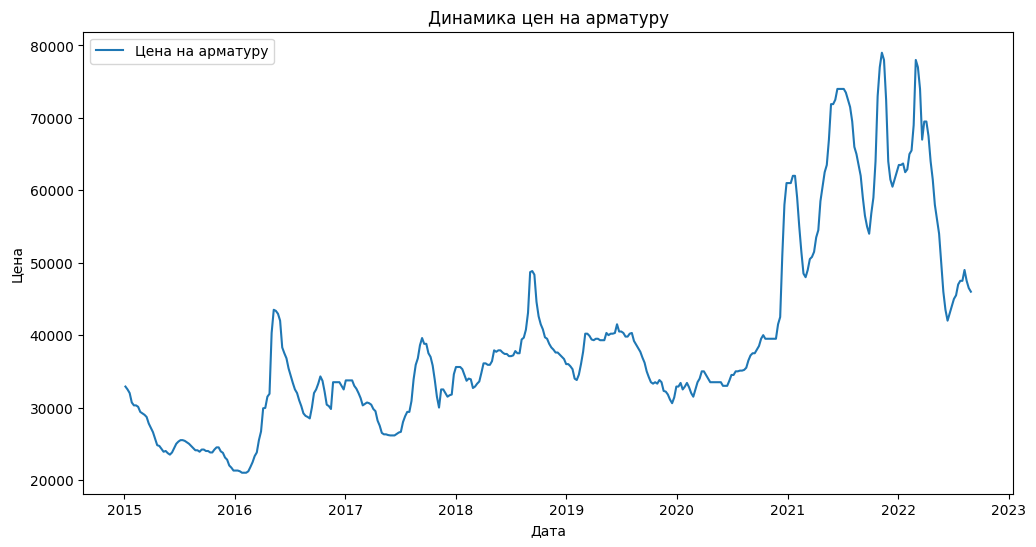

In [16]:
# Проверка на пропущенные значения
print(train_data.isnull().sum())

# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(train_data['dt'], train_data['Цена на арматуру'], label='Цена на арматуру')
plt.title('Динамика цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

Шаг 4
Предобработка данных

In [17]:
# Преобразование даты в формат datetime
train_data['dt'] = pd.to_datetime(train_data['dt'])
test_data['dt'] = pd.to_datetime(test_data['dt'])

# Создание признаков на основе даты
train_data['year'] = train_data['dt'].dt.year
train_data['month'] = train_data['dt'].dt.month
train_data['day'] = train_data['dt'].dt.day
train_data['day_of_week'] = train_data['dt'].dt.dayofweek

test_data['year'] = test_data['dt'].dt.year
test_data['month'] = test_data['dt'].dt.month
test_data['day'] = test_data['dt'].dt.day
test_data['day_of_week'] = test_data['dt'].dt.dayofweek

# Разделение данных на признаки и целевую переменную
X_train = train_data.drop(['dt', 'Цена на арматуру'], axis=1)
y_train = train_data['Цена на арматуру']
X_test = test_data.drop(['dt', 'Цена на арматуру'], axis=1)
y_test = test_data['Цена на арматуру']

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Шаг 5
Обучение модели

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Используем RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

Шаг 6 
Оценка модели


Среднеквадратичная ошибка (MSE): 237027433.25
Средняя абсолютная ошибка (MAE): 14027.82


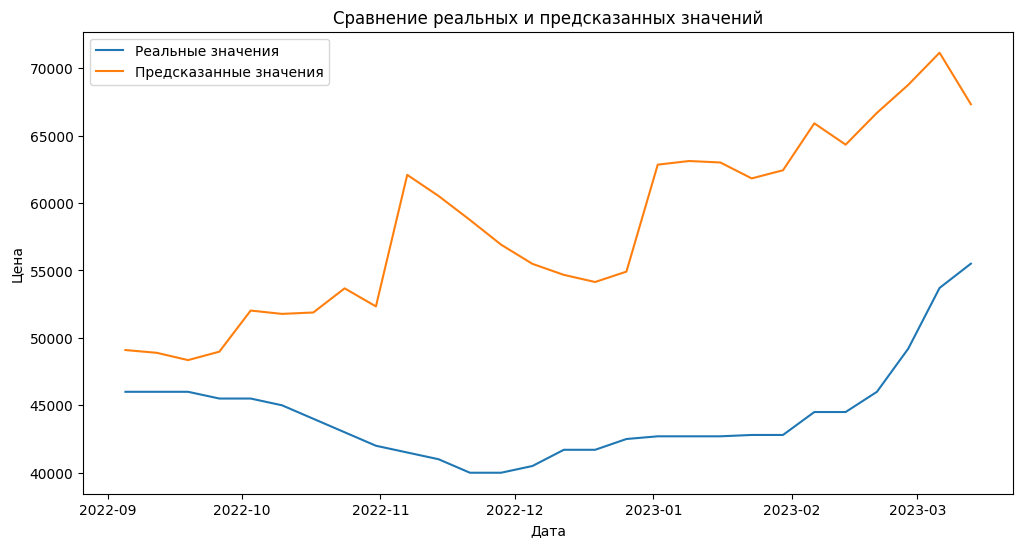

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')

# Визуализация предсказаний и реальных значений
plt.figure(figsize=(12, 6))
plt.plot(test_data['dt'], y_test, label='Реальные значения')
plt.plot(test_data['dt'], y_pred, label='Предсказанные значения')
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

Шаг 7
Рекомендации для закупки 

In [23]:
# Нахождение минимальной цены в тестовом наборе данных
min_price_index = y_test.argmin()
best_buy_date = test_data.loc[min_price_index, 'dt']
best_buy_price = y_test[min_price_index]

print(f'Рекомендуемая дата для закупки: {best_buy_date}')
print(f'Цена на арматуру в этот день: {best_buy_price:.2f}')

Рекомендуемая дата для закупки: 2022-11-21 00:00:00
Цена на арматуру в этот день: 40000.00
